In [1]:
import pandas as pd
import dask.dataframe as dd

<AxesSubplot:>

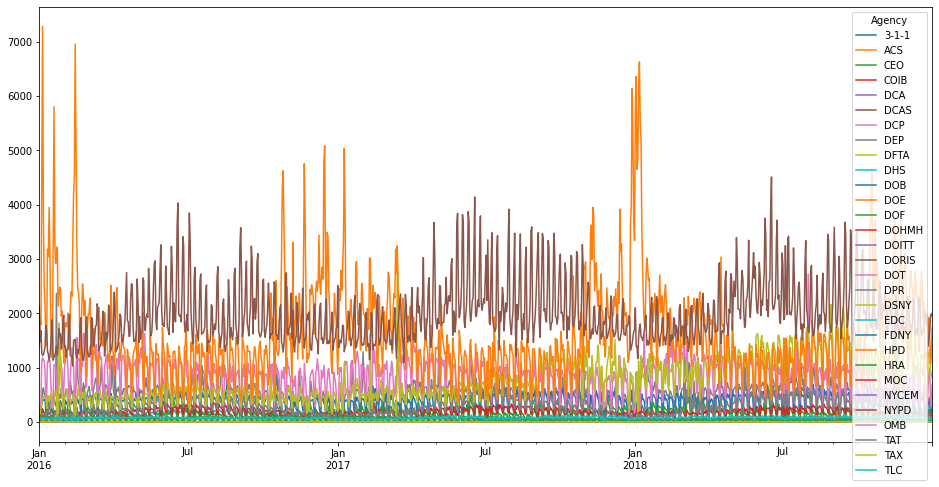

In [2]:
col =['Created Date', 'Agency', 'Complaint Type']
df = dd.read_csv(
    'Downloads/311-2016-2018.csv',
    blocksize=16 * 1024 * 1024,
    usecols=col,
)

def process(df):
    df['Created Date'] = df['Created Date'].map(lambda x:x.split()[0])
    res = df.groupby(['Created Date','Agency'])['Complaint Type'].count()
    return res
def count_complaint(df):
    df['Complaint Type'] = df['Complaint Type'].apply(lambda x:x.lower())
    res = df.groupby('Complaint Type').count()
    return res
result = process(df)
result = result.compute(num_workers=4)

res = result.reset_index().pivot(index='Created Date',
                          columns='Agency',
                          values='Complaint Type').fillna(0)
res.index = list(map(lambda x: pd.to_datetime(x,format='%m/%d/%Y'),res.index))
res = res.sort_index()
res.plot(figsize=(16,8))

In [ ]:
cols = ["Latitude", "Longitude",
       'Unique Key']
df = dd.read_csv(
    'Downloads/311-2016-2018.csv',
    blocksize=16 * 1024 * 1024, # 16MB chunks
    usecols=cols,
)

def calls_by_geo(df):
    by_geo = df.groupby(["Latitude", "Longitude"])['Unique Key'].count()
    return by_geo

result = calls_by_geo(df)
result = result.compute(num_workers=4)

print(result)